# Figures for the Tracking experiment results

First of all, let's reveiew what data do we have. we have:
- Projector image brightness
- trial number
- time


Here is a list of figures needed for demonstrating (and interpreting) the tracking experiment results:

#### For single session
- trial time vs. brightness
- trial time vs. brightness shifted
- distribution of brightness intensity for the whole session
- Trial vs. latency
- Latency distribution

#### Comparing multiple sessions
- Latency distribution of Display for different parameters (resolution, or FR)
- Average brightness trace for different parameters



In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import vrlatency as vrl

In [2]:
data_path = "../../data/Display"
figure_path = "../../figures/"

In [3]:
os.chdir(data_path)

In [4]:
filenames = []
for filename in glob.glob("*.csv"):
    print(filename)
    filenames.append(filename)

display_20180830_115317.csv
display_20180830_123133.csv
display_20180830_123445.csv
display_20180830_124007.csv
display_20180830_124242.csv
display_20180830_175009.csv
display_20180830_175220.csv
display_20180830_175249.csv
display_20180830_175922.csv
display_20180830_175944.csv
display_20180830_175957.csv
display_20180830_180145.csv
display_20180830_180216.csv
display_20180830_180339.csv
display_20180830_180657.csv
display_20180830_181301.csv
display_20180830_181639.csv
display_20180830_182344.csv
display_20180830_182735.csv
display_20180830_183236.csv
display_20180830_183706.csv
display_20180830_184108.csv
display_20180830_184346.csv
display_20180830_184633.csv
display_20180830_184938.csv
display_20180830_185858.csv
display_20180830_190230.csv
display_20180830_191215.csv
display_20181003_185323.csv


In [5]:
session_number = 16
filename = filenames[session_number]
session_name = filename.split('.')[0]
dfd = vrl.read_csv(filename)

In [6]:
dfd.head()

,Trial,Time,SensorBrightness
0,2,1578364,5
1,2,1578636,5
2,2,1578908,5
3,2,1579180,5
4,2,1579452,4


In [7]:
thresh = .8
df_transformed = vrl.analysis.transform_display_df(dfd, session=session_name, thresh=thresh)
df_clustered = df_transformed[df_transformed.Cluster == 0].copy()
df_shifted = vrl.analysis.shift_by_sse(df_clustered)

In [8]:
df_shifted.head()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc,Cluster
0,display_20180830_181639,2,0,1578.364,0.000,5,25.416,-26.776,0.8,0.0
1,display_20180830_181639,2,1,1578.636,0.272,5,25.416,-26.504,0.8,0.0
2,display_20180830_181639,2,2,1578.908,0.544,5,25.416,-26.232,0.8,0.0
3,display_20180830_181639,2,3,1579.180,0.816,5,25.416,-25.960,0.8,0.0
4,display_20180830_181639,2,4,1579.452,1.088,4,25.416,-25.688,0.8,0.0


---

In [9]:
plt.rcParams.update({'font.size': 20})

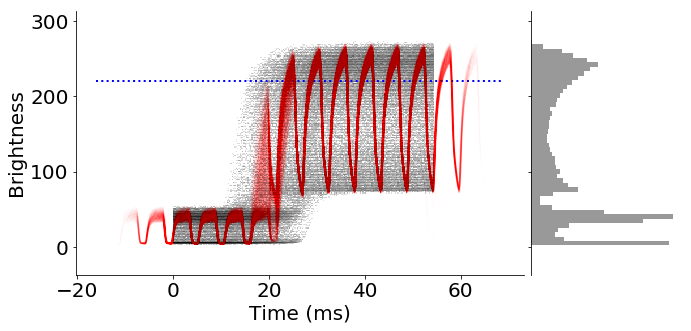

In [10]:
dd = df_shifted.copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

mean_latency = dd.groupby('Trial').DisplayLatency.mean().mean()
vrl.analysis.plot_display_brightness_over_session(trial_time=dd['TrialTime'], sensor_brightness=dd['SensorBrightness'],
                                                  nsamples_per_trial=dd.groupby('Trial')['DisplayLatency'].agg(len).min(),
                                                  ax=ax1)
vrl.analysis.plot_shifted_brightness_over_session(time=dd['TrialTransitionTime'], 
                                                  sensor_brightness=dd['SensorBrightness'],
                                                  trial_idx = dd['Trial'], shift_by=mean_latency, 
                                                  ax=ax1)
vrl.analysis.plot_brightness_threshold(sensor_brightness=dd['SensorBrightness'], thresh=dd['ThreshPerc'].values[0], ax=ax1)


vrl.analysis.plot_display_brightness_distribution(sensor_brightness=dd['SensorBrightness'].values, ax=ax2)
ax1.set_ylim(*ax2.get_ylim())
ax2.set(xticklabels='', yticklabels='')
ax2.set_xticks([])
ax1.set(xlabel='Time (ms)', ylabel='Brightness');

sns.despine(top=True, ax=ax1)
sns.despine(top=True, bottom=True, ax=ax2)

fig.tight_layout(w_pad=0)

plt.savefig(figure_path + 'display_a' + '_session' + str(session_number) + '.png', transparent=False)

## Average of the shifted brightness signals on top of the raw data

In [11]:
avg_SensorBrightness = df_shifted.groupby('Sample').SensorBrightness.apply(np.mean)
avg_TrialTime = df_shifted.groupby('Sample').TrialTime.apply(np.mean)

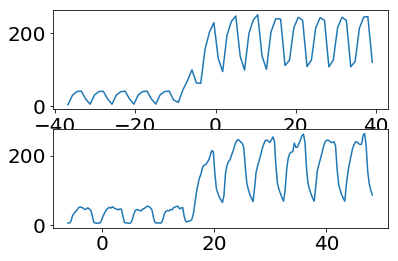

In [12]:
fig, (ax3, ax4) = plt.subplots(2, 1)

tt, bb = vrl.analysis.get_average_time_and_brightness(df_shifted)
ax3.plot(tt, bb)

ddd = df_shifted.loc[df_shifted['Trial'] == 3]
ax4.plot(ddd.TrialTransitionTime + mean_latency, ddd.SensorBrightness)

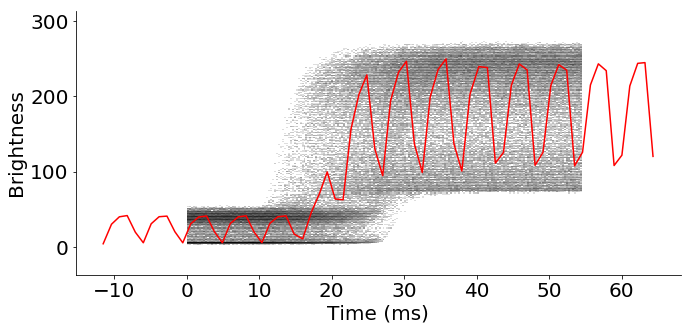

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

mean_latency = dd.groupby('Trial').DisplayLatency.mean().mean()
vrl.analysis.plot_display_brightness_over_session(trial_time=dd['TrialTime'], sensor_brightness=dd['SensorBrightness'],
                                                  nsamples_per_trial=dd.groupby('Trial')['DisplayLatency'].agg(len).min(),
                                                  ax=ax)
ax.plot(tt + mean_latency, bb, 'r')
# ax.plot(ddd.TrialTransitionTime + mean_latency, ddd.SensorBrightness, 'r')

ax.set_ylim(*ax1.get_ylim())
# ax.set_xlim(*ax1.get_xlim())
ax.set(xlabel='Time (ms)', ylabel='Brightness');

sns.despine(top=True, ax=ax)
fig.tight_layout()

plt.savefig(figure_path + 'display_avg' + '_session' + str(session_number) + '.png', transparent=False)

## Trials versus latency (with distribution)

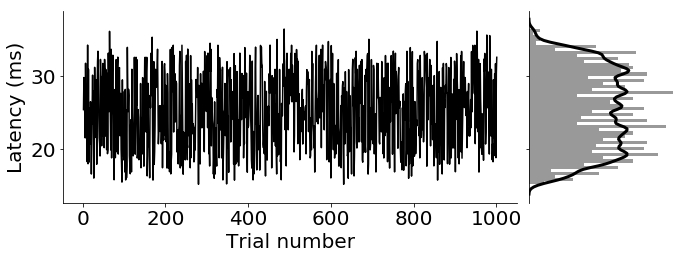

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)
vrl.analysis.plot_tracking_latency_over_session(dd.Trial, dd.DisplayLatency, ax=ax1)
ax1.set(xlabel='Trial number', ylabel='Latency (ms)')
sns.despine(top=True, ax=ax1)

vrl.analysis.plot_tracking_latency_distribution(dd['DisplayLatency'].values, ax=ax2)
sns.despine(top=True, bottom=True, ax=ax2)
ax2.set(xticklabels='')
ax2.set_xticks([])
fig.tight_layout(w_pad=0)

plt.savefig(figure_path + 'display_b' + '_session' + str(session_number) + '.png', transparent=False)

## Latency distribution alone

Enables comparison between different display latency measurements

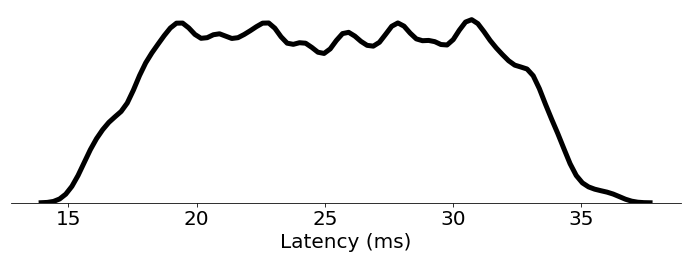

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.despine(left=True)

sns.distplot(dd.DisplayLatency.values, hist=False, color="k", kde_kws={"linewidth": 5, "alpha": 1}, ax=ax);
# ax.set(xlabel='Latency (ms)', ylabel='Frequency (normalized)');
ax.set(xlabel='Latency (ms)', ylabel='');
plt.yticks([]);
fig.tight_layout()

plt.savefig(figure_path + 'display_c' + '_session' + str(session_number) + '.png', transparent=False)